In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
from sklearn import metrics

# Melakukan Load Data

In [2]:
# Load dataset
data = pd.read_csv('c:/Users/andik/Downloads/MedCost.csv')

# 5 baris pertama Data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [33]:
# Mengetahui jumlah Kolom dan Baris
data.shape

(1338, 7)

In [34]:
# Melihat informasi Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [35]:
# Melakukan pengecekan Data yang mungkin hilang
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [36]:
# Melihat Data secara statistik
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Melakukan EDA (Exploratory Data Analysis)

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


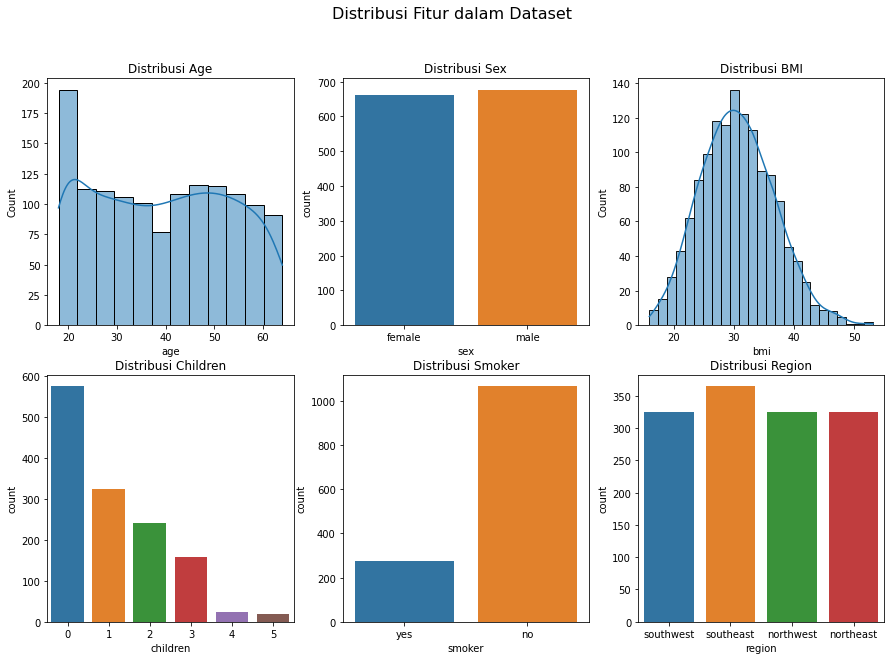

In [4]:
# Mengatur ukuran dan layout sub plot
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribusi Fitur dalam Dataset', fontsize=16)

# Fitur 'age'
sns.histplot(data=data, x='age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Age')

# Fitur 'sex'
sns.countplot(data=data, x='sex', ax=axes[0, 1])
axes[0, 1].set_title('Distribusi Sex')

# Fitur 'bmi'
sns.histplot(data=data, x='bmi', kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribusi BMI')

# Fitur 'children'
sns.countplot(data=data, x='children', ax=axes[1, 0])
axes[1, 0].set_title('Distribusi Children')

# Fitur 'smoker'
sns.countplot(data=data, x='smoker', ax=axes[1, 1])
axes[1, 1].set_title('Distribusi Smoker')

# Fitur 'region'
sns.countplot(data=data, x='region', ax=axes[1, 2])
axes[1, 2].set_title('Distribusi Region')

# Menampilkan plot
plt.show()

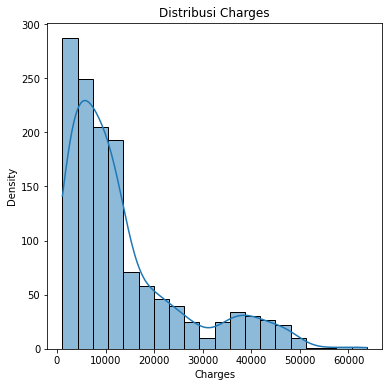

In [106]:
# Menampilkan distribusi 'charges'
plt.figure(figsize=(6, 6))
sns.histplot(data['charges'], bins=20, kde=True)
plt.title('Distribusi Charges')
plt.xlabel('Charges')
plt.ylabel('Density')

# Menampilkan plot
plt.show()

# Mengkonversi Fitur 'Kategori' menjadi 'Numerikal'

In [39]:
data.replace({'sex':{'male':0, 'female':1}}, inplace=True)
data.replace({'smoker':{'no':0, 'yes':1}}, inplace=True)
data.replace({'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}}, inplace=True)

In [40]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


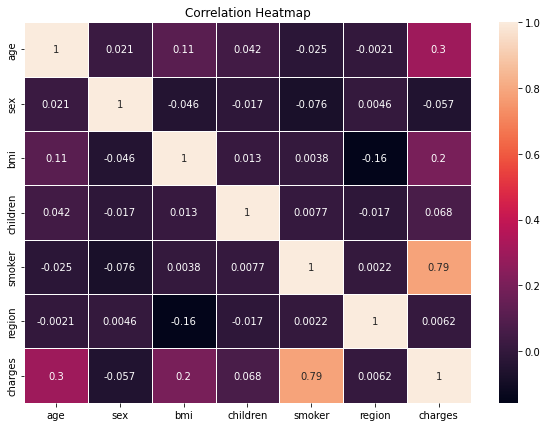

In [107]:
# Create heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

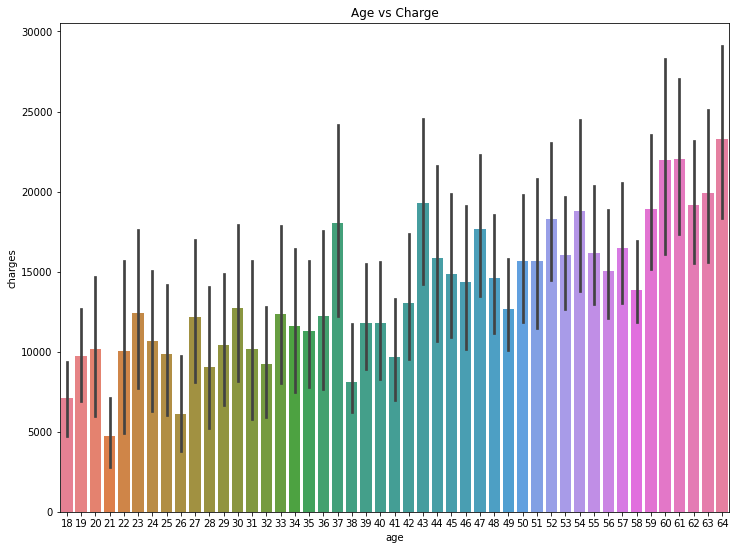

In [108]:
plt.figure(figsize=(12,9))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=data,palette='husl')
plt.savefig('c:/Users/andik/Downloads/sampleImages/Age.png')

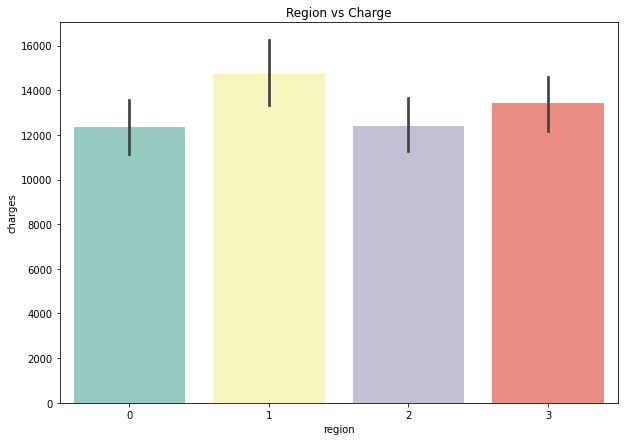

In [109]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data,palette='Set3')

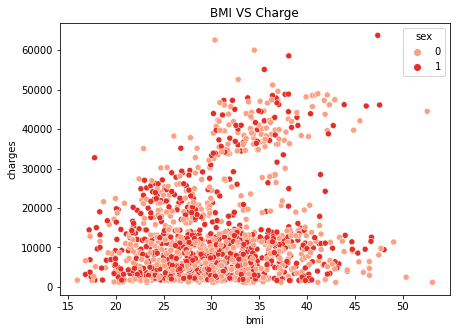

In [110]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data,palette='Reds')
plt.title('BMI VS Charge')

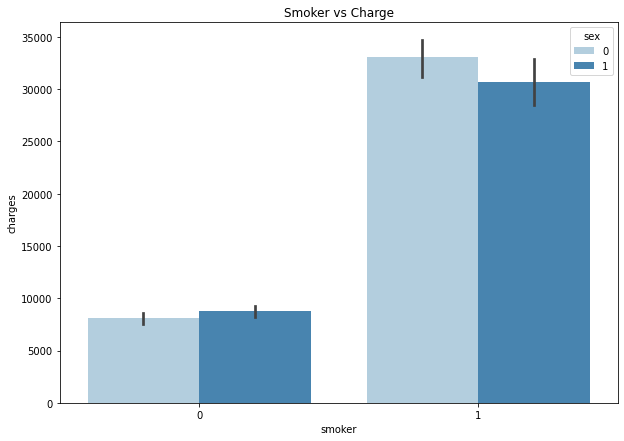

In [111]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data,palette='Blues',hue='sex')

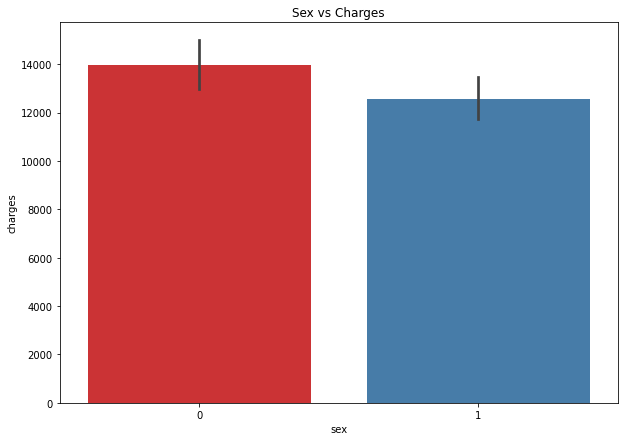

In [112]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data,palette='Set1')

# Melakukan pre processing Data dan melakukan Scaling

In [47]:
from sklearn.preprocessing import StandardScaler
data_pre = data.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()

,age,sex,bmi,children,smoker,region,charges
0,-1.438764,1,-0.453320,0,1,0,0.298584
1,-1.509965,0,0.509621,1,0,1,-0.953689
2,-0.797954,0,0.383307,3,0,1,-0.728675
3,-0.441948,0,-1.305531,0,0,2,0.719843
4,-0.513149,0,-0.292556,0,0,2,-0.776802


In [48]:
X = data_pre.drop('charges',axis=1).values
y = data_pre['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (1070, 6)
Size of y_train :  (1070, 1)
Size of X_test :  (268, 6)
Size of Y_test :  (268, 1)


# MengImport Libraries

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

# Linear Regression

In [50]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [51]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : 0.745
R2_score (train) : 0.742
R2_score (test) : 0.783
RMSE : 0.479


# Support Vector Machine (Regression)

In [52]:
X_c = data.drop('charges',axis=1).values
y_c = data['charges'].values.reshape(-1,1)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c,y_c,test_size=0.2, random_state=42)

X_train_scaled = StandardScaler().fit_transform(X_train_c)
y_train_scaled = StandardScaler().fit_transform(y_train_c)
X_test_scaled = StandardScaler().fit_transform(X_test_c)
y_test_scaled = StandardScaler().fit_transform(y_test_c)

In [55]:
svr = SVR()
parameters =  { 'kernel' : ['rbf', 'sigmoid'],
                 'gamma' : [0.001, 0.01, 0.1, 1, 'scale'],
                 'tol' : [0.0001],
                 'C': [0.001, 0.01, 0.1, 1, 10, 100] }

svr_grid = GridSearchCV(estimator=svr, param_grid=parameters, cv=10, verbose=4, n_jobs=-1)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 'scale'],
                         'kernel': ['rbf', 'sigmoid'], 'tol': [0.0001]},
             verbose=4)

In [56]:
svr = SVR(C=1, gamma=0.1, tol=0.0001)
svr.fit(X_train_scaled, y_train_scaled.ravel())
print(svr_grid.best_estimator_)
print(svr_grid.best_score_)

SVR(C=1, gamma=0.1, tol=0.0001)
0.8333384422544172


In [57]:
cv_svr = svr_grid.best_score_

y_pred_svr_train = svr.predict(X_train_scaled)
r2_score_svr_train = r2_score(y_train_scaled, y_pred_svr_train)

y_pred_svr_test = svr.predict(X_test_scaled)
r2_score_svr_test = r2_score(y_test_scaled, y_pred_svr_test)

rmse_svr = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_svr_test)))

print('CV : {0:.3f}'.format(cv_svr.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_svr_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_svr_test))
print('RMSE : {0:.3f}'.format(rmse_svr))

CV : 0.833
R2_score (train) : 0.848
R2 score (test) : 0.868
RMSE : 0.363


# Ridge Regressor

In [58]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

steps = [ ('scalar', StandardScaler()),
        ('poly', PolynomialFeatures(degree=2)),
        ('model', Ridge())]

ridge_pipe = Pipeline(steps)

In [59]:
parameters = { 'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,2,5,10,20,25,35, 43,55,100], 'model__random_state' : [42]}
reg_ridge = GridSearchCV(ridge_pipe, parameters, cv=10)
reg_ridge = reg_ridge.fit(X_train, y_train.ravel())

c:\Users\andik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.25804e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\andik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.83441e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
c:\Users\andik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.27101e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [60]:
reg_ridge.best_estimator_, reg_ridge.best_score_

(Pipeline(steps=[('scalar', StandardScaler()), ('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8267846959650346)

In [61]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train_scaled.ravel())
cv_ridge = reg_ridge.best_score_

y_pred_ridge_train = ridge.predict(X_train_scaled)
r2_score_ridge_train = r2_score(y_train_scaled, y_pred_ridge_train)

y_pred_ridge_test = ridge.predict(X_test_scaled)
r2_score_ridge_test = r2_score(y_test_scaled, y_pred_ridge_test)

rmse_ridge = (np.sqrt(mean_squared_error(y_test_scaled, y_pred_linear_reg_test)))
print('CV : {0:.3f}'.format(cv_ridge.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_ridge_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_ridge_test))
print('RMSE : {0:.3f}'.format(rmse_ridge))

CV : 0.827
R2 score (train) : 0.741
R2 score (test) : 0.785
RMSE : 0.465


# RandomForest Regressor

In [62]:
reg_rf = RandomForestRegressor()
parameters = { 'n_estimators':[250,500,750],
             'max_features': ["auto"],
             'max_depth':[40,50,60],
             'min_samples_split': [5,7,9],
             'min_samples_leaf': [7,10,12],
             'criterion': ['friedman_mse']}

reg_rf_gscv = GridSearchCV(estimator=reg_rf, param_grid=parameters, cv=10, n_jobs=-1)
reg_rf_gscv = reg_rf_gscv.fit(X_train_scaled, y_train_scaled.ravel())

c:\Users\andik\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [63]:
reg_rf_gscv.best_score_, reg_rf_gscv.best_estimator_

(0.8488616125605702,
 RandomForestRegressor(criterion='friedman_mse', max_depth=50,
                       max_features='auto', min_samples_leaf=12,
                       min_samples_split=7, n_estimators=250))

In [64]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=5, n_estimators=250)
rf_reg.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=5,
                      n_estimators=250)

In [65]:
cv_rf = reg_rf_gscv.best_score_

y_pred_rf_train = rf_reg.predict(X_train_scaled)
r2_score_rf_train = r2_score(y_train, y_pred_rf_train)

y_pred_rf_test = rf_reg.predict(X_test_scaled)
r2_score_rf_test = r2_score(y_test_scaled, y_pred_rf_test)

rmse_rf = np.sqrt(mean_squared_error(y_test_scaled, y_pred_rf_test))

print('CV : {0:.3f}'.format(cv_rf.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test))
print('RMSE : {0:.3f}'.format(rmse_rf))

CV : 0.849
R2 score (train) : 0.885
R2 score (test) : 0.880
RMSE : 0.347


# GradientBoosting Regression

In [67]:
gb_reg = GradientBoostingRegressor()

parameters = {
    "n_estimators":[250,500,750],
    "max_depth":[4,5,6],
    "min_samples_split":[5,7,9],
    "loss": ["huber"]
}

gb_reg_gscv = GridSearchCV(estimator=gb_reg, param_grid=parameters, cv=10, n_jobs=-1)
gb_reg_gscv = gb_reg_gscv.fit(X_train_scaled, y_train_scaled.ravel())

In [68]:
gb_reg_gscv.best_score_, gb_reg_gscv.best_estimator_

(0.83977827090801,
 GradientBoostingRegressor(loss='huber', max_depth=4, min_samples_split=9,
                           n_estimators=250))

In [69]:
gb_reg = GradientBoostingRegressor(max_depth=4, min_samples_split=9, n_estimators=250)
gb_reg.fit(X_train_scaled, y_train_scaled.ravel())

GradientBoostingRegressor(max_depth=4, min_samples_split=9, n_estimators=250)

In [70]:
cv_gb = gb_reg_gscv.best_score_

y_pred_gb_train = gb_reg.predict(X_train_scaled)
r2_score_gb_reg_train = r2_score(y_train, y_pred_gb_train)

y_pred_gb_reg_test = gb_reg.predict(X_test_scaled)
r2_score_gb_reg_test = r2_score(y_test_scaled, y_pred_gb_reg_test)

rmse_gb_reg = np.sqrt(mean_squared_error(y_test_scaled, y_pred_gb_reg_test))

print('CV : {0:.3f}'.format(cv_gb.mean()))
print('R2 score (train) : {0:.3f}'.format(r2_score_gb_reg_train))
print('R2 score (test) : {0:.3f}'.format(r2_score_gb_reg_test))
print('RMSE : {0:.3f}'.format(rmse_gb_reg))

CV : 0.840
R2 score (train) : 0.952
R2 score (test) : 0.863
RMSE : 0.371


In [71]:
models = [('Linear Regression', rmse_linear, r2_score_linear_reg_train, r2_score_linear_reg_test, cv_linear_reg.mean()),
          ('Ridge Regression', rmse_ridge, r2_score_ridge_train, r2_score_ridge_test, cv_ridge.mean()),
          ('Support Vector Regression', rmse_svr, r2_score_svr_train, r2_score_svr_test, cv_svr.mean()),
          ('Random Forest Regression', rmse_rf, r2_score_rf_train, r2_score_rf_test, cv_rf.mean()),
          ('GradientBoosting Regression', rmse_gb_reg, r2_score_gb_reg_train, r2_score_gb_reg_test, cv_gb.mean())
         ]

In [72]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict = predict.sort_values(by="Cross-Validation", ascending=False)
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
3,Random Forest Regression,0.346521,0.884836,0.879923,0.848862
4,GradientBoosting Regression,0.370660,0.952126,0.862611,0.839778
2,Support Vector Regression,0.363328,0.847930,0.867993,0.833338
1,Ridge Regression,0.464576,0.741445,0.784527,0.826785
0,Linear Regression,0.479088,0.741705,0.783346,0.744805


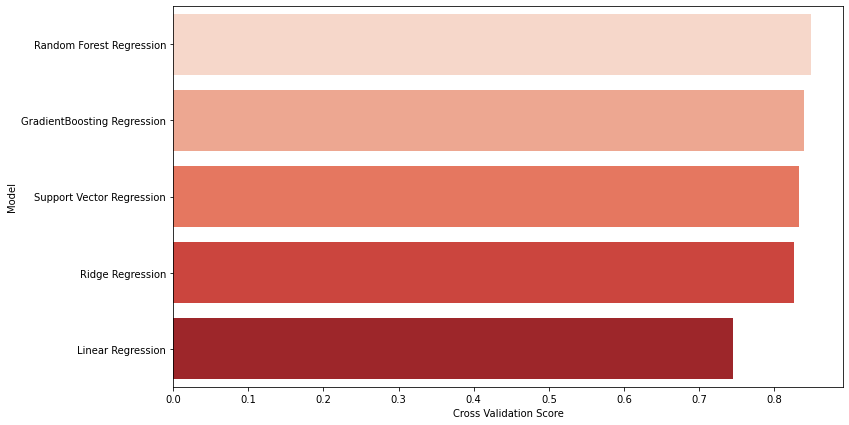

In [73]:
plt.figure(figsize=(12,7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',data = predict, palette='Reds')
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

In [92]:
X_ = data.drop('charges',axis=1).values
y_ = data['charges'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_,y_,test_size=0.2, random_state=42)

print('Size of X_train_ : ', X_train_.shape)
print('Size of y_train_ : ', y_train_.shape)
print('Size of X_test_ : ', X_test_.shape)
print('Size of Y_test_ : ', y_test_.shape)

Size of X_train_ :  (1070, 6)
Size of y_train_ :  (1070, 1)
Size of X_test_ :  (268, 6)
Size of Y_test_ :  (268, 1)


In [75]:
rf_reg = RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                       n_estimators=1000)
rf_reg.fit(X_train_, y_train_.ravel())

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1000)

In [76]:
y_pred_rf_train_ = rf_reg.predict(X_train_)
r2_score_rf_train_ = r2_score(y_train_, y_pred_rf_train_)

y_pred_rf_test_ = rf_reg.predict(X_test_)
r2_score_rf_test_ = r2_score(y_test_, y_pred_rf_test_)

print('R2 score (train) : {0:.3f}'.format(r2_score_rf_train_))
print('R2 score (test) : {0:.3f}'.format(r2_score_rf_test_))

R2 score (train) : 0.885
R2 score (test) : 0.878


In [97]:
import pickle

Pkl_Filename = "rf_tuned.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rf_reg, file)

In [98]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    gbr_tuned_loaded = pickle.load(file)

In [79]:
rf_tuned_loaded

RandomForestRegressor(max_depth=50, min_samples_leaf=12, min_samples_split=7,
                      n_estimators=1000)

In [100]:
age = 50
sex = 0
bmi = 25
children = 0
smoker = 0
region = 1

# SEX, Laki-Laki: 0, Perempuan: 1
# PEROKOK, Tidak: 0, Iya: 1
# REGION, SouthWest:0, SouthEast:1, NorthWest:2, NorthEast:3

In [101]:
features = [[age, sex, bmi, children, smoker, region]]

In [102]:
predicted_charges = rf_tuned_loaded.predict(features)

In [103]:
# Menampilkan hasil prediksi
print("Prediksi biaya charges: ", predicted_charges)

Prediksi biaya charges:  [11396.71957312]
